# Take-Home Assignment Week 3
## Santiago Bernheim

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

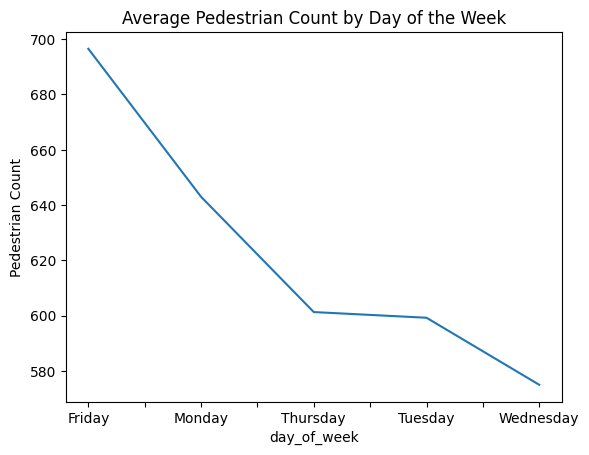

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Create new column to know which day it is.
df['day_of_week'] = pd.to_datetime(df['hour_beginning'], format= '%m/%d/%Y %I:%M:%S %p').dt.day_name()

# Filter data to include only weekdays
df_weekdays = df[(df['day_of_week'] != 'Saturday') & (df['day_of_week'] != 'Sunday')]

# Plot a line graph showing the pedestrian count by day of the week
df_weekdays.groupby('day_of_week')['Pedestrians'].mean().plot(kind='line')
plt.title('Average Pedestrian Count by Day of the Week')
plt.ylabel('Pedestrian Count')
plt.show()  # Display the plot


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

- This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.
- Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.



Pedestrian Counts by Weather Summary:
                            mean  median  count         std
weather_summary                                            
partly-cloudy-day    1574.093627  1632.0   1773  866.684380
clear-day            1382.183298  1380.0   1413  876.267199
wind                  679.000000   403.0      4  901.998522
cloudy                543.225041   122.0   1813  738.191931
rain                  229.822076    52.0    607  373.117494
snow                  222.631579    29.5     38  344.718328
fog                   212.409091    80.0     22  330.504039
sleet                 178.250000   155.5      8  188.028683
partly-cloudy-night    52.765922    10.0   1209  120.030159
clear-night            33.233871     4.0   1860   78.936746


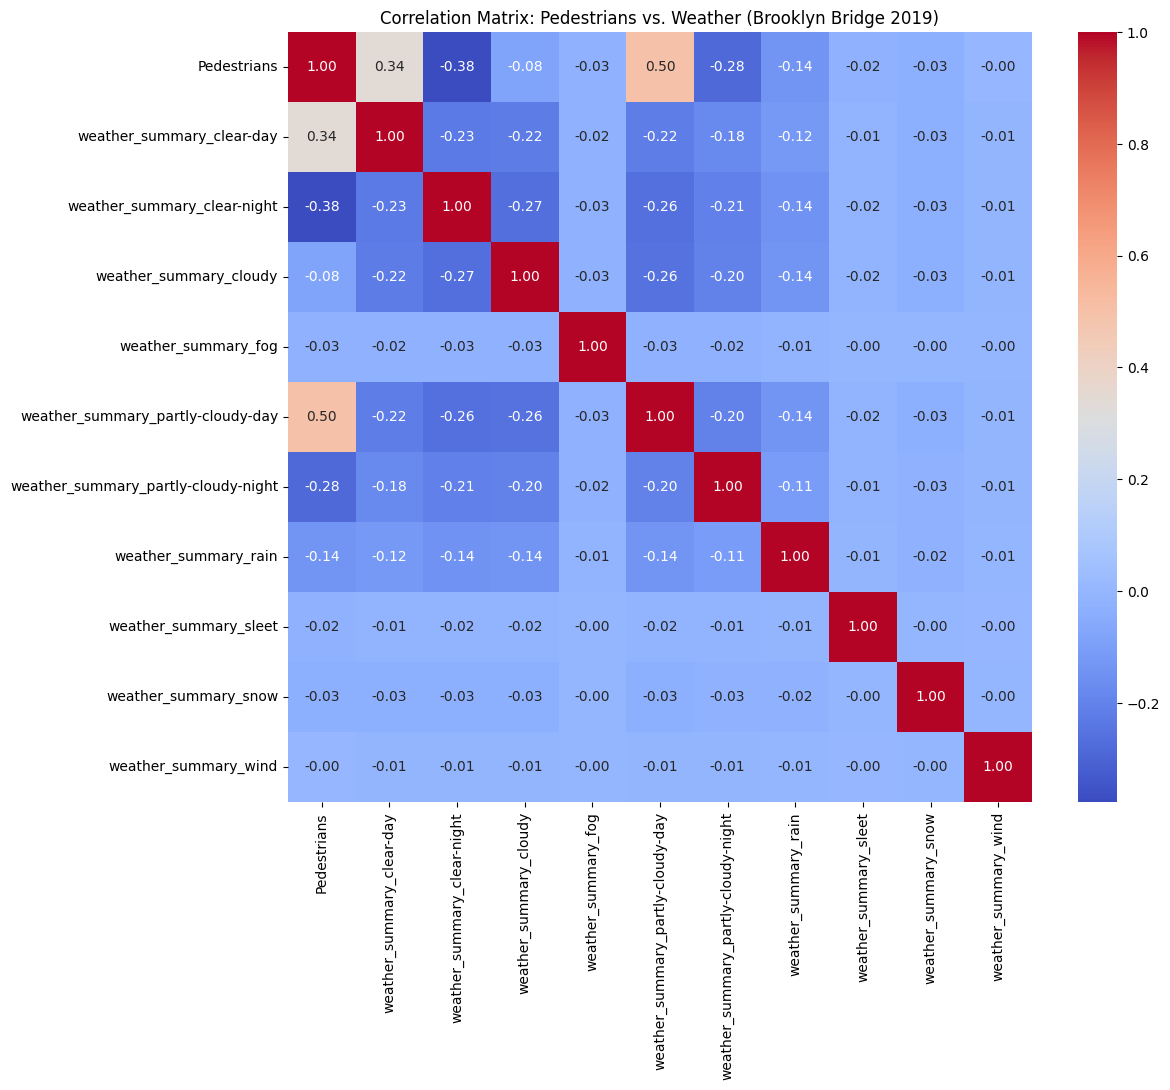

Correlation between Pedestrians and Weather:
Pedestrians                            1.000000
weather_summary_partly-cloudy-day      0.497867
weather_summary_clear-day              0.339758
weather_summary_wind                  -0.000170
weather_summary_sleet                 -0.017091
weather_summary_fog                   -0.026457
weather_summary_snow                  -0.034052
weather_summary_cloudy                -0.081255
weather_summary_rain                  -0.138581
weather_summary_partly-cloudy-night   -0.282081
weather_summary_clear-night           -0.377297
Name: Pedestrians, dtype: float64


In [53]:
import seaborn as sns

# Filter the data frame only for 2019
df_only_2019 = df[df['hour_beginning'].str.contains('2019')]

# Group by weather summary and analyze pedestrian counts
grouped_weather = df_only_2019.groupby('weather_summary')['Pedestrians'].agg(['mean', 'median', 'count', 'std'])
print("\nPedestrian Counts by Weather Summary:")
print(grouped_weather.sort_values(by='mean', ascending=False))

# Doing one hot encodig for the weather_summary column
df_only_2019 = pd.get_dummies(df_only_2019, columns=['weather_summary'])

# Select relevant columns for correlation analysis
weather_columns = [col for col in df_only_2019.columns if col.startswith('weather_summary')]
correlation_data = df_only_2019[['Pedestrians'] + weather_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()


# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Pedestrians vs. Weather (Brooklyn Bridge 2019)')
plt.show()

# Analyze correlations (example)
print("Correlation between Pedestrians and Weather:")
print(correlation_matrix['Pedestrians'].sort_values(ascending=False))



3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

- Students can also show plots analyzing activity.


Pedestrian Counts by Time of Day:
                    mean  median  count         std
time_of_day                                        
Afternoon    1597.836821  1648.0   4014  861.465984
Morning       605.661435   367.0   4014  627.581370
Evening       440.113104   180.0   2007  568.650351
Night         216.658419    11.0   6022  564.481977


/var/folders/4c/654xyldd6qgb9x6zjs5gt9mm0000gn/T/ipykernel_67975/1738727874.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_time_of_day = df.groupby('time_of_day')['Pedestrians'].agg(['mean', 'median', 'count', 'std'])


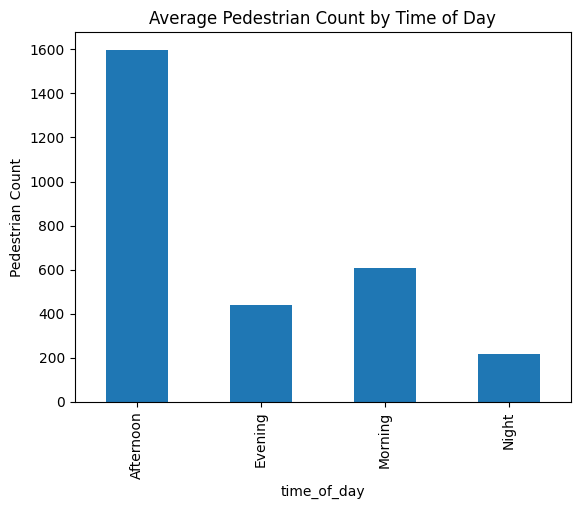

In [54]:
# Create new column to know what time of the day it is
df['hour'] = df['hour_beginning'].str.split(' ').str[1].str.split(':').str[0].astype(int) + df['hour_beginning'].str.split(' ').str[2].map({'AM': 0, 'PM': 12})

#Create new column to know the hour of the day in between am and pm times
df['time_of_day'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 21, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], ordered=False)


# Count the Pedestrians for every time of the day
grouped_time_of_day = df.groupby('time_of_day')['Pedestrians'].agg(['mean', 'median', 'count', 'std'])
print("\nPedestrian Counts by Time of Day:")
print(grouped_time_of_day.sort_values(by='mean', ascending=False))

# plot the pedestrian count by time of the day
grouped_time_of_day['mean'].plot(kind='bar')
plt.title('Average Pedestrian Count by Time of Day')
plt.ylabel('Pedestrian Count')
plt.show()  # Display the plot